In [1]:
import numpy as np 
import torch 
import torch.nn as nn
from  Data_Loader import DATA_1M
from helper_functions import accuracy_fn
from CnnModel import NeuralNetCNN
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, recall_score)
import warnings 
warnings.filterwarnings('ignore')

C:\Users\janat\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Com Fourier

In [2]:
%%time
data = DATA_1M(seconds=14,columns=2000, jump_time =2, n_jumps=3)
print(data)
data_fourier = data(Fourier=True, Normalizing= True)
data_fourier.shape

# 14 segundos ,  (70002, 2001)

Número de linhas 23334000, equivalente a 14 segundos 
 Pulando em 2 segundos em 3 vezes
tamanho da memória ocupada :1068.68 MB
CPU times: total: 26.5 s
Wall time: 2min 7s


(70002, 2001)

In [140]:
data.clear

shape array (100000000, 1),

                Clear array 
 [[ 0.0000000e+00-6.1037244e-05j]
 [-3.0518622e-05+3.0518622e-05j]
 [-6.1037244e-05-3.0518622e-05j]
 ...
 [-6.1037244e-05+6.1037244e-05j]
 [ 0.0000000e+00-3.0518622e-05j]
 [ 9.1555863e-05-1.8311173e-04j]] 
  
                memory usage 762.94 MB


In [141]:
data.wifi  

shape array (100000000, 1),

               WIFI array 
 [[ 0.0000000e+00+6.1037244e-05j]
 [ 1.5259311e-04-3.0518622e-05j]
 [ 6.1037244e-05-1.5259311e-04j]
 ...
 [-2.1363035e-04-1.2207449e-04j]
 [-9.1555863e-05-2.4414898e-04j]
 [-6.1037244e-05+1.8311173e-04j]] 
  
                memory usage 762.94 MB


In [142]:
data.lte

shape array (100000000, 1),

                LTE array 
[[-3.0518622e-05+0.0000000e+00j]
 [-9.1555863e-05+1.2207449e-04j]
 [-6.1037244e-05+6.1037244e-05j]
 ...
 [-9.1555863e-05+1.5259311e-04j]
 [-2.7466760e-04+6.1037244e-05j]
 [-3.0518623e-04+6.1037244e-05j]] 
  
                memory usage 762.94 MB


In [3]:
%%time
Torch = NeuralNetCNN(columns= data_fourier.shape[1] -1)

CPU times: total: 93.8 ms
Wall time: 92.7 ms


In [6]:
model = Torch.Cnn
model

Classifier(
  (conv): Sequential(
    (0): ConvBlock(
      (conv1): Sequential(
        (0): Conv1d(2000, 512, kernel_size=(2,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv1d(512, 512, kernel_size=(2,), stride=(1,), padding=(1,))
        (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU()
      )
      (conv2): Sequential(
        (0): Conv1d(512, 512, kernel_size=(2,), stride=(1,), padding=(1,))
        (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Tanh()
        (3): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (4): Conv1d(512, 512, kernel_size=(2,), stride=(1,), padding=(1,))
        (5): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (6): Tanh()
        (7): MaxPool1d(kernel_size=2, s

In [4]:
data.Spliting(data= data_fourier, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)


X_train shape: (52501, 2000) float64
X_Test shape: (17501, 2000) float64
y_train shape: (52501,) float64
y_test shape: (17501,) float64

--------
X_train device: cpu
X_Test device: cpu
y_train device: cpu
y_test device: cpu
Valor 0: 23334 ocorrência(s)- 0.33%
Valor 1: 23334 ocorrência(s)- 0.33%
Valor 2: 23334 ocorrência(s)- 0.33%
Dataset :  (70002, 2001)


In [5]:
train_dataloader , test_dataloader = data.DataLoaders(batch_size=128, inplace=True)

X torch.Size([128, 2000]) y torch.Size([128])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001D610266410>, <torch.utils.data.dataloader.DataLoader object at 0x000001D43C723010>)
Length of train dataloader: 411 batches of 128
Length of test dataloader: 137 batches of 128


#### Fourer + Normalizado , 14 segundos de captura, 25 epocas, 128 batch size

In [7]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 10)




Training on cpu


  0%|          | 0/10 [00:00<?, ?it/s]

 Epoch: 0
---------


  0%|          | 0/10 [01:44<?, ?it/s]


KeyboardInterrupt: 

In [16]:
print(Torch(test= True, train= True))


   Test Accuracy  Test Loss   Train Accuracy  Train Loss
0          35.63      168.45           34.93        1.10
1          37.64      167.59           36.77        1.09
2          39.40      166.70           38.78        1.09
3          40.88      165.66           41.02        1.08
4          42.77      164.06           43.25        1.07
5          44.41      162.35           45.48        1.05
6          45.92      161.18           47.34        1.04
7          47.50      159.52           49.15        1.03
8          48.19      158.74           50.45        1.02
9          48.99      157.82           51.84        1.01


In [17]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data.y_test, Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.48      0.49      0.48     26234
        WIFI       0.56      0.49      0.52     25879
         LTE       0.45      0.49      0.47     26012

    accuracy                           0.49     78125
   macro avg       0.49      0.49      0.49     78125
weighted avg       0.49      0.49      0.49     78125



In [ ]:
%%time
data = DATA_1M(seconds=28,columns=2000, jump_time =2, n_jumps=3) ; data_fourier = data(Fourier=True, Normalizing= True)
Torch = NeuralNetCNN(columns= data_fourier.shape[1] -1)
data.Spliting(data= data_fourier, random_state= 30, test_size = 0.25, shuffle = True, inplace= False)

# 14 segundos ,  (70002, 2001)

In [ ]:
train_dataloader , test_dataloader = data.DataLoaders(batch_size=128, inplace=True)

In [ ]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 25)



In [133]:
optimizer = optim.Adam(model.parameters(), lr=lr)


{'params': [Parameter containing:
  tensor([[[ 3.1562e+71,  7.9105e+71],
           [-1.3420e+72, -3.7677e+71],
           [-1.4976e+72, -4.9873e+71],
           ...,
           [ 1.0824e+72,  9.2557e+71],
           [ 1.1066e+71,  1.1151e+72],
           [-9.3122e+71, -1.2459e+72]],
  
          [[ 4.4548e+71,  3.7407e+71],
           [ 4.8837e+70,  5.3196e+71],
           [-1.3483e+72, -1.3468e+72],
           ...,
           [ 6.2752e+71, -5.8780e+71],
           [-1.5791e+71, -6.9617e+70],
           [ 4.5421e+71, -1.1246e+72]],
  
          [[ 6.6986e+70,  1.6525e+72],
           [-8.2572e+71,  7.5852e+70],
           [ 6.5247e+71,  5.3949e+70],
           ...,
           [-7.9375e+71, -9.5663e+71],
           [ 5.6863e+71,  9.4202e+71],
           [-1.2139e+71,  2.0171e+71]],
  
          ...,
  
          [[-2.2853e+70, -1.1650e+72],
           [ 2.1425e+70, -1.7550e+72],
           [-5.7133e+71,  6.8838e+71],
           ...,
           [-3.2067e+69,  1.8814e+71],
           [-1

In [134]:
import math
import torch.optim as optim
model =Torch.Cnn
lr = 1e-6
optimizer = optim.Adam(model.parameters(), lr=lr)
loss_fn = Torch.loss_fn


losses = []
log_lrs = []

epochs =10
model.double()

for epoch in range(epochs):
    print(f" Epoch: {epoch}\n---------")
    for batch, (inputs, target) in enumerate(train_dataloader):

        inputs = inputs.to('cpu').double()
        inputs = inputs.unsqueeze(2)
        # fazendo as previsões
        output = model(inputs.double())

        # calculando a perda
        loss = loss_fn(output, target.long())

        best_loss = loss.item()
        # Store the values
        if lr > 0 :
            losses.append(loss.item())
            log_lrs.append(math.log10(lr))
        else:
            pass
        # Do the backward pass and optimize
        loss.backward()
        optimizer.step()
        # Update the lr for the next step and store
        # Aumentar a taxa de aprendizagem exponencialmente
        lr *= 1.05
        optimizer.param_group[0  ]['lr'] = lr

 Epoch: 0
---------


AttributeError: 'Adam' object has no attribute 'param_group'

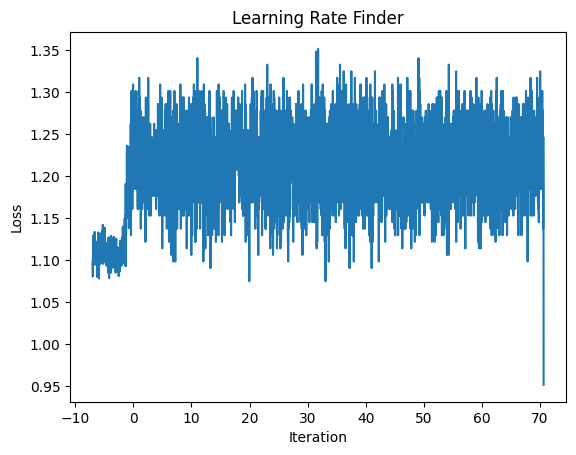

In [122]:
import matplotlib.pyplot as plt 
plt.plot(log_lrs, losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Learning Rate Finder')
plt.show()

In [129]:
math.log10(-1)

ValueError: math domain error

### Sem Fourier

In [126]:
import math

lrs = []
for lr in log_lrs:
    if lr > 0:
        lrs.append(math.log10(lr))

In [119]:
lrs

[-1.8646131412461038,
 -1.4578309752178644,
 -1.2515282985032574,
 -1.1122370815163471,
 -1.0069378716703796,
 -0.9222525255350779,
 -0.8514165108066893,
 -0.7905303323532206,
 -0.7371400004962164,
 -0.6896005277313332,
 -0.6467552761037594,
 -0.6077599433883797,
 -0.5719793351003387,
 -0.5389235470786153,
 -0.5082067770951068,
 -0.47951977105591026,
 -0.45261082234828914,
 -0.42727232368398355,
 -0.40333103138665416,
 -0.3806408763955414,
 -0.35907756215467795,
 -0.33853444155916473,
 -0.3189193259200089,
 -0.3001519840256547,
 -0.2821621596113391,
 -0.2648879834030811,
 -0.2482746890961745,
 -0.2322735660266937,
 -0.2168410980347567,
 -0.20193825015868344,
 -0.18752987371457505,
 -0.17358420693911436,
 -0.16007245334690962,
 -0.14696842372584784,
 -0.13424823058160978,
 -0.12189002607240623,
 -0.10987377621103034,
 -0.09818106547322424,
 -0.08679492702747293,
 -0.07569969465739948,
 -0.0648808731333184,
 -0.054325024341554125,
 -0.04401966692734127,
 -0.033953187571375554,
 -0.024114

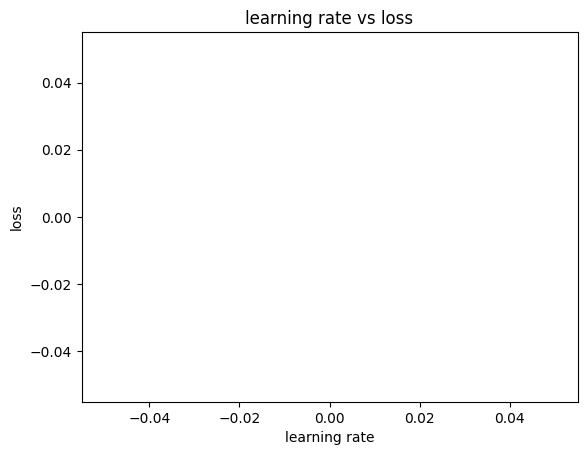

In [76]:
import matplotlib.pyplot as plt 
logs,losses= find_lr(model= Torch.Cnn, loss_fn= Torch.loss_fn, optimizer= Torch.optimizer)
plt.plot(logs,losses)
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('learning rate vs loss')
plt.show()
# train the model

In [61]:
losses

[tensor(1.0827, dtype=torch.float64, grad_fn=<NllLossBackward0>)]

In [17]:
find_lr(model= Torch.Cnn, loss_fn= Torch.loss_fn, optimizer= Torch.optimizer)

([], [])

In [20]:
import torch.optim  as optim


optimizer = optim.Adam([
{ 'params': Torch.Cnn.parameters(), 'lr': 0.0125},
], lr=0.125)

In [29]:
optimizer.param_groups[0]["lr"]

0.0125

In [11]:
%%time
data = DATA_1M(seconds=40,columns=20000, jump_time =0, n_jumps=1)
print(data)
data_fourier = data(Fourier=True)
data_fourier.shape

Numero de linhas 100000000 equivalente a 40 segundos
 Pulando em 0 segundos , em 1 vezes
Tamanho da memoria ocupada :4577.87 MB
CPU times: total: 14min 1s
Wall time: 34min 29s


(30000, 20001)

In [12]:
data.Spliting(data= data_fourier, random_state= 38, test_size = 0.275, shuffle = True, inplace= False)


X_train shape: (21750, 20000) float64
X_Test shape: (8250, 20000) float64
y_train shape: (21750,) float64
y_test shape: (8250,) float64

--------
Valor 0: 10000 ocorrência(s)- 0.33%
Valor 1: 10000 ocorrência(s)- 0.33%
Valor 2: 10000 ocorrência(s)- 0.33%
Dataset :  (30000, 20001)


In [13]:
train_dataloader , test_dataloader = data.DataLoaders(batch_size=64, inplace=True)

X shape , Y shape torch.Size([64, 20000]) torch.Size([64])
----------------

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001E0EE4EFFD0>, <torch.utils.data.dataloader.DataLoader object at 0x000001E0EE1D94D0>)
Length of train dataloader: 340 batches of 64
Length of test dataloader: 129 batches of 64


In [14]:
%%time
Torch.training_loop(data_loader_train=train_dataloader,
data_loader_test = test_dataloader,
        model=Torch.Cnn, 
        loss_fn=Torch.loss_fn,
        optimizer=Torch.optimizer,
        accuracy_fn=accuracy_fn,
        device=Torch.device,
        epochs = 15)



Training on cpu


  0%|          | 0/15 [00:00<?, ?it/s]

 Epoch: 0
---------
Train loss: 1.34507 | Train accuracy: 38.98%


  7%|▋         | 1/15 [13:47<3:13:01, 827.28s/it]

Test loss: 84.69437 | Test accuracy: 41.67%
 Epoch: 1
---------
Train loss: 1.23940 | Train accuracy: 48.65%


 13%|█▎        | 2/15 [27:15<2:56:50, 816.17s/it]

Test loss: 90.13758 | Test accuracy: 30.20%
 Epoch: 2
---------
Train loss: 1.08449 | Train accuracy: 65.32%


 20%|██        | 3/15 [41:02<2:44:14, 821.21s/it]

Test loss: 85.79268 | Test accuracy: 40.52%
 Epoch: 3
---------
Train loss: 0.99929 | Train accuracy: 74.36%


 27%|██▋       | 4/15 [54:35<2:29:58, 818.00s/it]

Test loss: 86.04421 | Test accuracy: 39.24%
 Epoch: 4
---------
Train loss: 0.95456 | Train accuracy: 79.09%


 33%|███▎      | 5/15 [1:08:34<2:17:34, 825.40s/it]

Test loss: 86.70774 | Test accuracy: 38.63%
 Epoch: 5
---------
Train loss: 0.92030 | Train accuracy: 82.59%


 40%|████      | 6/15 [1:22:22<2:03:55, 826.15s/it]

Test loss: 86.27540 | Test accuracy: 39.31%
 Epoch: 6
---------
Train loss: 0.88564 | Train accuracy: 85.98%


 47%|████▋     | 7/15 [1:35:11<1:47:41, 807.73s/it]

Test loss: 86.88641 | Test accuracy: 38.86%
 Epoch: 7
---------
Train loss: 0.85450 | Train accuracy: 89.21%


 53%|█████▎    | 8/15 [1:48:31<1:33:56, 805.18s/it]

Test loss: 87.64834 | Test accuracy: 37.73%
 Epoch: 8
---------
Train loss: 0.83719 | Train accuracy: 90.87%


 60%|██████    | 9/15 [2:02:30<1:21:34, 815.70s/it]

Test loss: 87.55235 | Test accuracy: 38.43%
 Epoch: 9
---------
Train loss: 0.82399 | Train accuracy: 92.23%


 67%|██████▋   | 10/15 [2:16:19<1:08:19, 819.91s/it]

Test loss: 87.34147 | Test accuracy: 38.42%
 Epoch: 10
---------
Train loss: 0.81576 | Train accuracy: 92.98%


 73%|███████▎  | 11/15 [2:30:09<54:51, 822.98s/it]  

Test loss: 87.66981 | Test accuracy: 38.00%
 Epoch: 11
---------
Train loss: 0.81025 | Train accuracy: 93.51%


 80%|████████  | 12/15 [2:43:41<40:58, 819.64s/it]

Test loss: 87.86864 | Test accuracy: 37.72%
 Epoch: 12
---------
Train loss: 0.80280 | Train accuracy: 94.27%


 87%|████████▋ | 13/15 [2:57:12<27:13, 816.83s/it]

Test loss: 87.00118 | Test accuracy: 39.11%
 Epoch: 13
---------
Train loss: 0.79937 | Train accuracy: 94.61%


 93%|█████████▎| 14/15 [3:10:39<13:34, 814.03s/it]

Test loss: 86.97332 | Test accuracy: 39.22%
 Epoch: 14
---------
Train loss: 0.79809 | Train accuracy: 94.72%


100%|██████████| 15/15 [3:24:08<00:00, 816.55s/it]

Test loss: 87.60427 | Test accuracy: 38.22%
CPU times: total: 20h 14min 1s
Wall time: 3h 24min 8s


In [15]:
print(Torch(test= True, train= True))





    Test Accuracy  Test Loss   Train Accuracy  Train Loss
0       38.215467   87.604266       38.984375    1.345068
1       38.215467   87.604266       48.654684    1.239400
2       38.215467   87.604266       65.315564    1.084490
3       38.215467   87.604266       74.356447    0.999285
4       38.215467   87.604266       79.091605    0.954565
5       38.215467   87.604266       82.588848    0.920301
6       38.215467   87.604266       85.979541    0.885640
7       38.215467   87.604266       89.214495    0.854497
8       38.215467   87.604266       90.866353    0.837193
9       38.215467   87.604266       92.227158    0.823987
10      38.215467   87.604266       92.979133    0.815760
11      38.215467   87.604266       93.506774    0.810251
12      38.215467   87.604266       94.273046    0.802804
13      38.215467   87.604266       94.605971    0.799371
14      38.215467   87.604266       94.717967    0.798092


In [16]:
class_names = ['CLEAR','WIFI','LTE']

print(classification_report(data.y_test, Torch.Making_Predictions(model = Torch.Cnn, data_loader= test_dataloader),target_names=class_names))

              precision    recall  f1-score   support

       CLEAR       0.39      0.55      0.45      2716
        WIFI       0.41      0.34      0.37      2809
         LTE       0.35      0.25      0.29      2725

    accuracy                           0.38      8250
   macro avg       0.38      0.38      0.37      8250
weighted avg       0.38      0.38      0.37      8250

